In [1]:
%matplotlib inline


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
appnope             0.1.0
backcall            0.2.0
cffi                1.14.1
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
future_fstrings     NA
get_version         2.1
h5py                2.10.0
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
llvmlite            0.34.0
matplotlib          3.3.1
mpl_toolkits        NA
natsort             7.0.1
numba               0.51.1
numexpr             2.7.1
numpy               1.19.4
packaging           20.4
pandas              1.1.5
parso               0.7.1
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.7
ptyprocess          0.6.0
pygments            2.6.1
pylab               NA
pyparsing 

In [3]:
import os
os.chdir('/Users/gabriele.lubatti/Desktop/Phd/Cell_Competition/Cell_Competition_Github/Input_data_Paper_Figures')

In [4]:
adata = ad.read_text("data_fmk.txt").T
metadata = pd.read_csv('meta_fmk.txt', sep=" ",dtype="category")

In [5]:
adata

AnnData object with n_obs × n_vars = 367 × 37351

In [6]:
adata.obs['cell_name']=list(metadata['cell_name'])
adata.obs['orig_cluster'] = list(metadata['nomi_cluster'])

In [7]:
len(adata.obs['cell_name'])

367

In [8]:
adata.X = adata.X.astype('float64') 

In [9]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, svd_solver='arpack')

running recipe zheng17
filtered out 4492 genes that are detected in less than 1 counts


/opt/anaconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:00)
computing PCA
    with n_comps=50


/opt/anaconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:00)


In [10]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:00)


In [11]:
sc.tl.paga(adata,groups='orig_cluster')

/opt/anaconda3/envs/cellrank/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'orig_cluster' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

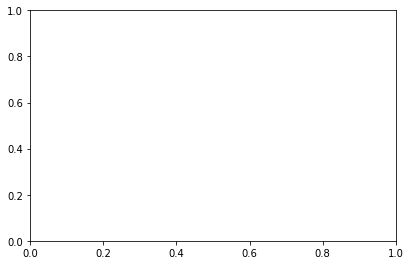

In [14]:
sc.pl.paga(adata,color=['orig_cluster'],threshold=0.1)

In [ ]:
###From now untill the end of the script is not useful anymore

In [15]:
adata = ad.read_text("data_raw_fmk.txt").T
metadata = pd.read_csv('meta_dati_fmk.txt', sep=" ",dtype="category")

In [16]:
adata.obs['cell_name']=list(metadata['cell_name'])
adata.obs['orig_cluster'] = list(metadata['nomi_cluster'])

In [17]:
import scipy
#os.chdir('/Volumes/GABRIELE')
trans = scipy.sparse.load_npz('revisione_dinamica.npz')
trans.shape
trans

<274x274 sparse matrix of type '<class 'numpy.float32'>'
	with 14071 stored elements in Compressed Sparse Row format>

In [18]:
trans[trans < 0.01] = 0
#trans = csr_matrix(trans)
trans


/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/compressed.py:287: SparseEfficiencyWarning: Comparing a sparse matrix with a scalar greater than zero using < is inefficient, try using >= instead.
  warn(bad_scalar_msg, SparseEfficiencyWarning)
/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


<274x274 sparse matrix of type '<class 'numpy.float32'>'
	with 75076 stored elements in Compressed Sparse Row format>

In [19]:
adata.uns['velocyto_transitions'] = trans

In [20]:
adata.uns['velocity_graph']=trans

In [21]:
sc.pp.recipe_zheng17(adata)
sc.tl.pca(adata, svd_solver='arpack')

running recipe zheng17
filtered out 5706 genes that are detected in less than 1 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
normalizing counts per cell
    finished (0:00:00)
    finished (0:00:01)
computing PCA
    with n_comps=50
    finished (0:00:00)


In [75]:
sc.pp.neighbors(adata, n_neighbors=4, n_pcs=20)
sc.tl.draw_graph(adata)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:00)


In [76]:
sc.tl.paga(adata,groups='orig_cluster')

... storing 'orig_cluster' as categorical


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


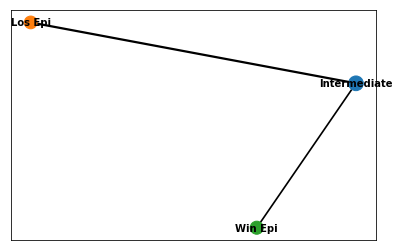

In [77]:
sc.pl.paga(adata,color=['orig_cluster'],threshold=0.2)

In [78]:
sc.tl.paga(adata,groups='orig_cluster', use_rna_velocity=True)

running PAGA
    finished: added
    'paga/transitions_confidence', connectivities adjacency (adata.uns) (0:00:00)


In [79]:
pos=adata.uns['paga']['pos']
transition=adata.uns['paga']['transitions_confidence']
transition

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Column format>

--> added 'pos', the PAGA positions (adata.uns['paga'])


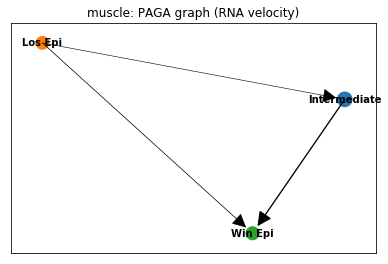

In [80]:
sc.pl.paga(adata, edge_width_scale=0.2, pos=pos, transitions='transitions_confidence',
           title='muscle: PAGA graph (RNA velocity)', save='_muscle_rna_velocity') 